
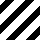
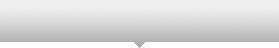
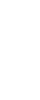
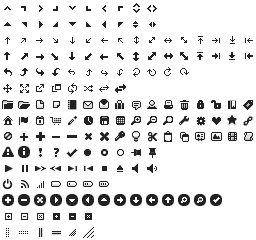
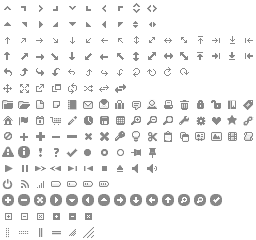
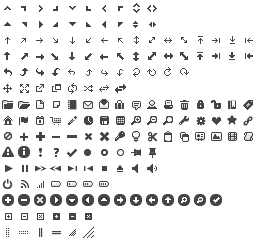
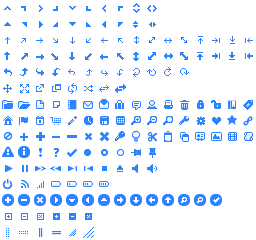
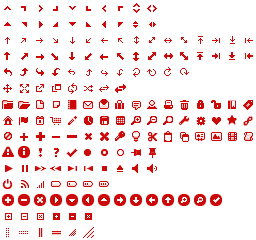
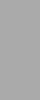
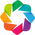
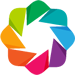
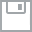
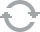
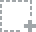
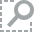
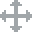
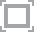
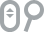

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
output_notebook()

%matplotlib inline

# Statsmodel APIs
import statsmodels.api as sm



In [21]:
# 1. Projectile 
# Create an array for time and another array for height
x = np.array([0, 0.5, 1, 1.5, 2, 2.5])
X = np.c_[x,x**2]
y = np.array([0, 20.5, 31.36, 36.25, 30.41, 28.23])



In [23]:
X

array([[ 0.  ,  0.  ],
       [ 0.5 ,  0.25],
       [ 1.  ,  1.  ],
       [ 1.5 ,  2.25],
       [ 2.  ,  4.  ],
       [ 2.5 ,  6.25]])

In [28]:
results = sm.OLS(y, X).fit()


In [29]:
results.params

array([ 43.91151553, -13.38322981])

In [46]:
results = sm.OLS(y, X).fit()
v, a = results.params

r2 = results.rsquared

p = figure(title='projectile')
p.circle(x,y,color="blue",size=8)

x1 = np.array(range(0,100))*.04

y1 = []
for val in x1:
    y1.append(v*val + a*val**2)


p.line(x1,y1,color='red')

show(p)
           

 

b) Find the time at which the projectile hit the ground.

In [39]:
print x1


[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44
  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92
  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32  1.36  1.4
  1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8   1.84  1.88
  1.92  1.96  2.    2.04  2.08  2.12  2.16  2.2   2.24  2.28  2.32  2.36
  2.4   2.44  2.48  2.52  2.56  2.6   2.64  2.68  2.72  2.76  2.8   2.84
  2.88  2.92  2.96  3.    3.04  3.08  3.12  3.16  3.2   3.24  3.28  3.32
  3.36  3.4   3.44  3.48  3.52  3.56  3.6   3.64  3.68  3.72  3.76  3.8
  3.84  3.88  3.92  3.96]


In [40]:
print y1


[0.0, 1.7350474534161489, 3.4272685714285709, 5.0766633540372661, 6.6832318012422354, 8.2469739130434778, 9.7678896894409917, 11.245979130434783, 12.681242236024843, 14.073679006211179, 15.423289440993788, 16.730073540372672, 17.994031304347821, 19.215162732919254, 20.393467826086955, 21.528946583850928, 22.621599006211177, 23.671425093167702, 24.678424844720496, 25.642598260869558, 26.563945341614904, 27.442466086956518, 28.278160496894408, 29.071028571428567, 29.821070310558998, 30.528285714285708, 31.192674782608691, 31.814237515527946, 32.392973913043477, 32.928883975155273, 33.421967701863352, 33.8722250931677, 34.279656149068316, 34.644260869565215, 34.966039254658384, 35.24499130434782, 35.48111701863354, 35.674416397515522, 35.824889440993772, 35.932536149068319, 35.997356521739121, 36.019350559006199, 35.99851826086956, 35.934859627329182, 35.828374658385087, 35.679063354037254, 35.486925714285704, 35.251961739130429, 34.97417142857141, 34.653554782608694, 34.290111801242226, 

In [41]:
for a,b in zip(x1,y1):
    if (-0.1 < b ) & (b < .1) :
        print a, b

0.0 0.0
3.28 0.0476313043478


The projectile hit the ground at 3.28 seconds

In [43]:
# Healthcare problem
# Create arrays for year and cost
year = np.array([1976,1980,1987,1993,1998])
cost = np.array([618,860,1324,1865,2256])

In [48]:
# Add intercept
Year = sm.add_constant(year, prepend=True)

In [47]:
# Plot the data points
p2 = figure(title='Cost of Healthcare')
p2.circle(year,cost,color="blue",size=8)
show(p2)

In [55]:
# Probably uses a linear model
results2 = sm.OLS(cost, Year).fit()
intercept, slope = results2.params

p2 = figure(title='Cost of Healthcare')
p2.circle(year,cost,color="blue",size=8)

year1 = range(min(year),max(year)+20)

# For loop:
cost1 = []
for val in year1:
    cost1.append(intercept + slope*val)
# This generates y1 again, but with one line of code instead
# List Comprehension:
cost1 = [intercept + slope*val for val in year1]

p2.line(year1,cost1,color='red')

show(p2)

In [52]:
print intercept

-148005.980416


In [53]:
print slope

75.1915544676


In [ ]:
# b) Find the time the average healthcare cost will reach $2800 per person.
# cost = intercept + slope* year
# 2800 = -148005.980416 + 75.1915544676 * year
# 150805.980416 = 75.1915544676 * year
# 2005.62392257739817 = year
# the middle of 2005. 

In [59]:
for a2,b2 in zip(year1,cost1):
    print a2, b2

1976 572.53121175
1977 647.722766218
1978 722.914320686
1979 798.105875153
1980 873.297429621
1981 948.488984088
1982 1023.68053856
1983 1098.87209302
1984 1174.06364749
1985 1249.25520196
1986 1324.44675643
1987 1399.63831089
1988 1474.82986536
1989 1550.02141983
1990 1625.2129743
1991 1700.40452876
1992 1775.59608323
1993 1850.7876377
1994 1925.97919217
1995 2001.17074663
1996 2076.3623011
1997 2151.55385557
1998 2226.74541004
1999 2301.9369645
2000 2377.12851897
2001 2452.32007344
2002 2527.51162791
2003 2602.70318237
2004 2677.89473684
2005 2753.08629131
2006 2828.27784578
2007 2903.46940024
2008 2978.66095471
2009 3053.85250918
2010 3129.04406365
2011 3204.23561812
2012 3279.42717258
2013 3354.61872705
2014 3429.81028152
2015 3505.00183599
2016 3580.19339045
2017 3655.38494492


In [141]:
# Question 3
# Import the data
x3 = np.array([-1,0,1,2,3,5,7,9])
y3 = np.array([-1,3,2.5,5,4,2,5,4])

In [142]:
y3

array([-1. ,  3. ,  2.5,  5. ,  4. ,  2. ,  5. ,  4. ])

In [143]:
# Plot the points
p3 = figure(title='Question3')
p3.circle(x3,y3,color="blue",size=8)
show(p3)

In [144]:
X3 = np.vander(x3, 6)

In [145]:
X3

array([[   -1,     1,    -1,     1,    -1,     1],
       [    0,     0,     0,     0,     0,     1],
       [    1,     1,     1,     1,     1,     1],
       [   32,    16,     8,     4,     2,     1],
       [  243,    81,    27,     9,     3,     1],
       [ 3125,   625,   125,    25,     5,     1],
       [16807,  2401,   343,    49,     7,     1],
       [59049,  6561,   729,    81,     9,     1]])

In [146]:
results3 = sm.OLS(y3,X3).fit()

In [147]:
results3.params

array([-0.00356478,  0.05669497, -0.19526535, -0.49613384,  2.56120985,
        2.02515133])

In [148]:
p3 = figure(title='Question3')
p3.circle(x3,y3,color="blue",size=8)

x1 = range(-5,10)

xx = np.linspace(-1.25,10,100)
p3.line(xx,results3.predict(np.vander(xx,6)), color='red')

show(p3)
           

In [149]:
# Explore regularization
from sklearn.linear_model import Ridge, Lasso



In [170]:
#alpha is the 's'
ridge = Ridge(alpha = .9)
ridge.fit(np.vander(x3, 6), y3)

lasso = Lasso(alpha = 1)
lasso.fit(np.vander(x3, 6), y3)

p4 = figure(title='Blue = True; Red = OLS')
p4.circle(x3, y3, size=8,color='blue')

xx = np.linspace(-1.25,10,100)
p4.line(xx, results3.predict(np.vander(xx,6)), color='red')
p4.line(xx, ridge.predict(np.vander(xx,6)), color='green')
p4.line(xx, lasso.predict(np.vander(xx,6)), color='cyan')
show(p4)


In [167]:
# Import wine data
data_red = pd.read_csv('winequality-red.csv', sep =';')
data_white = pd.read_csv('winequality-white.csv', sep =';')

In [169]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


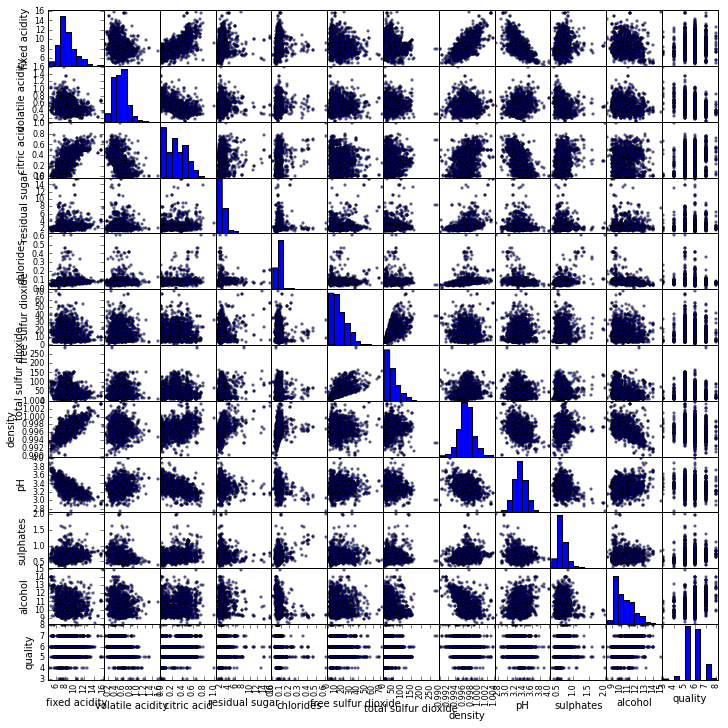

In [171]:
# Use scatter matrix 
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data_red, figsize = (12,12))
# 5a. Red wine correlations: 
# Positive linear correlation: density and fixed acidity, fixed acidity and density, citric acid and fixed acidity, total sulfer dioxide and free sulfur dioxide, 
# negative linear correlation: citric acid and volatile acidity, fixed acidity and pH, density and alcohol
# 5b. quality score: higher quality associated with less chlorides, sulphates

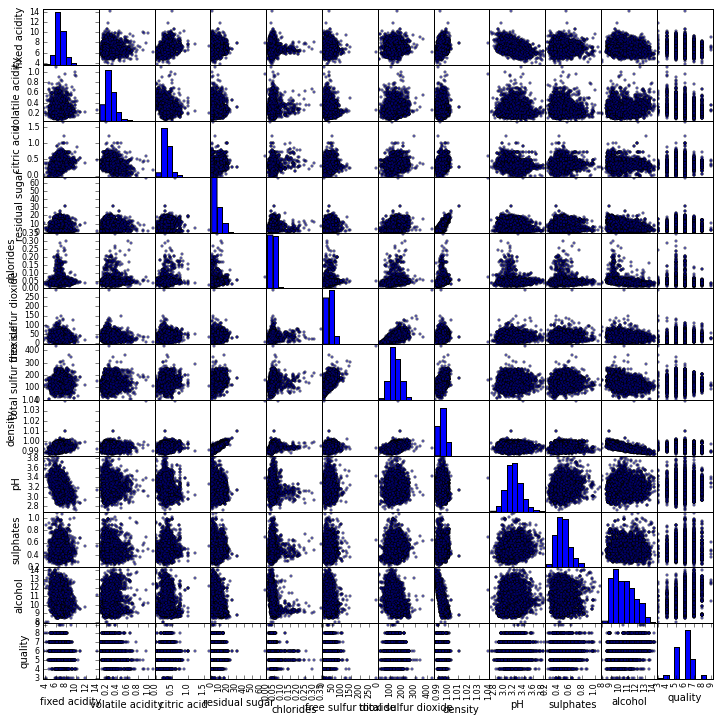

In [173]:
from pandas.tools.plotting import scatter_matrix
scat2 = scatter_matrix(data_white, figsize = (12,12))
# 5a. White wine correlations:
# negative correlation: Density and alcohol
# positive correlation: residual sugar and density,
#5b. quality score: higher quality score associated with less citric acide, less chlorides, less total sulfer dioxide

In [ ]:
# 5c. How many features are there? Are they normalized?
# there are 12 features and not all measurements have the same range

In [174]:

6. Use a generalized linear model to predict the quality score of the wine.
a. What precautions will you take to account for the imbalance between different the amount of data in each class?
b. How will you treat the fact that the score is discrete in value?
7. How will you assess the goodness of your model? (hint: has to do with errors)
8. Check if regularization improves the outcome of your predictions

SyntaxError: invalid syntax (<ipython-input-174-8d1b7cda6736>, line 1)